# When the automatic groups are not sufficient

In [1]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_col,
    geom_line,
    labs,
    scale_color_hue
)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Some data to plot

In [2]:
df = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'],
    'pos': [1, 2, 3, 4],
    'num_of_letters': [5, 4, 5, 5]
})

df

,letter,pos,num_of_letters
0,Alpha,1,5
1,Beta,2,4
2,Delta,3,5
3,Gamma,4,5


/Users/hassan/scm/python/plotnine/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


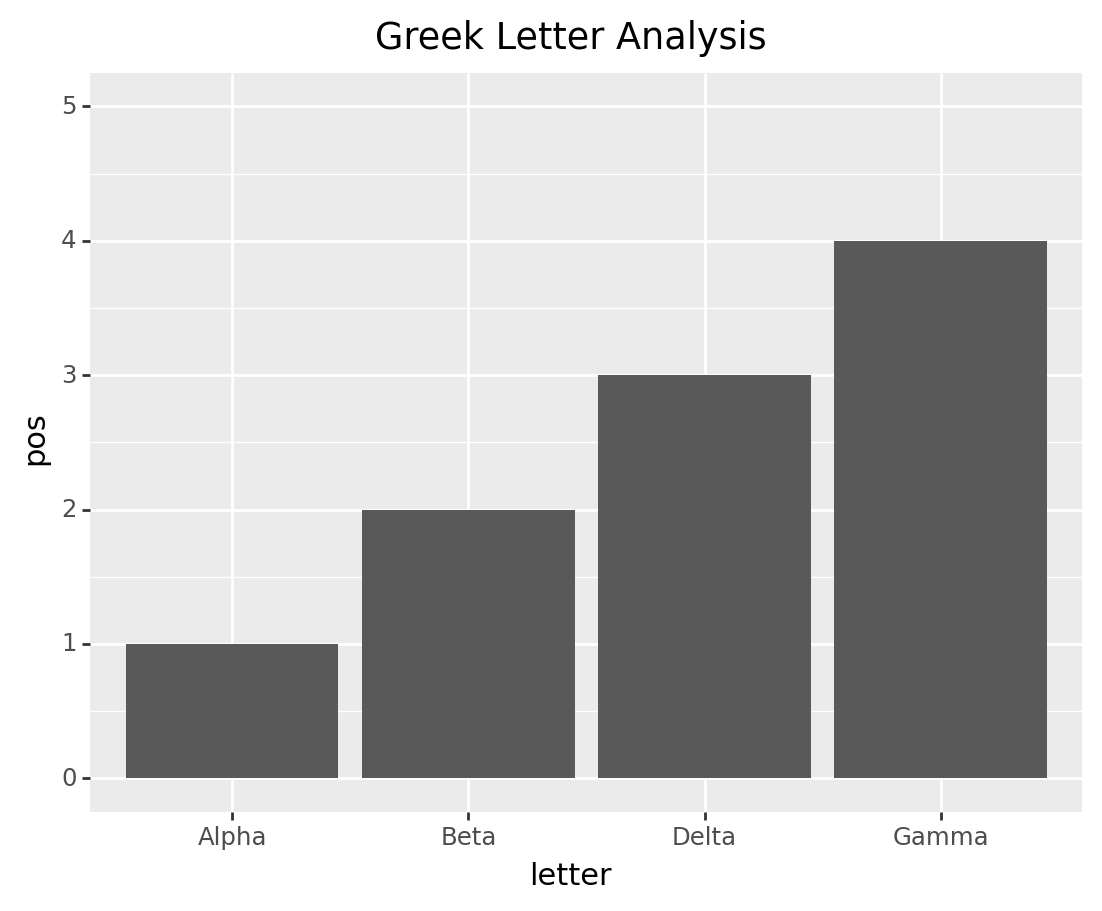

<ggplot: (329878210)>

In [3]:
(ggplot(df)
 + geom_col(aes(x='letter', y='pos'))
 + geom_line(aes(x='letter', y='num_of_letters'))
 + labs(title='Greek Letter Analysis')
)

We get a plot with a warning and no line(s). This is not what we expected.

The issue is we have 4 groups (Alpha, Beta, ...) and each of those groups has a single point. This is a case where the automatic grouping is not sufficient (or just not what you expect). The solution is to manually set the group for `geom_line` so that all
points belong to one group.

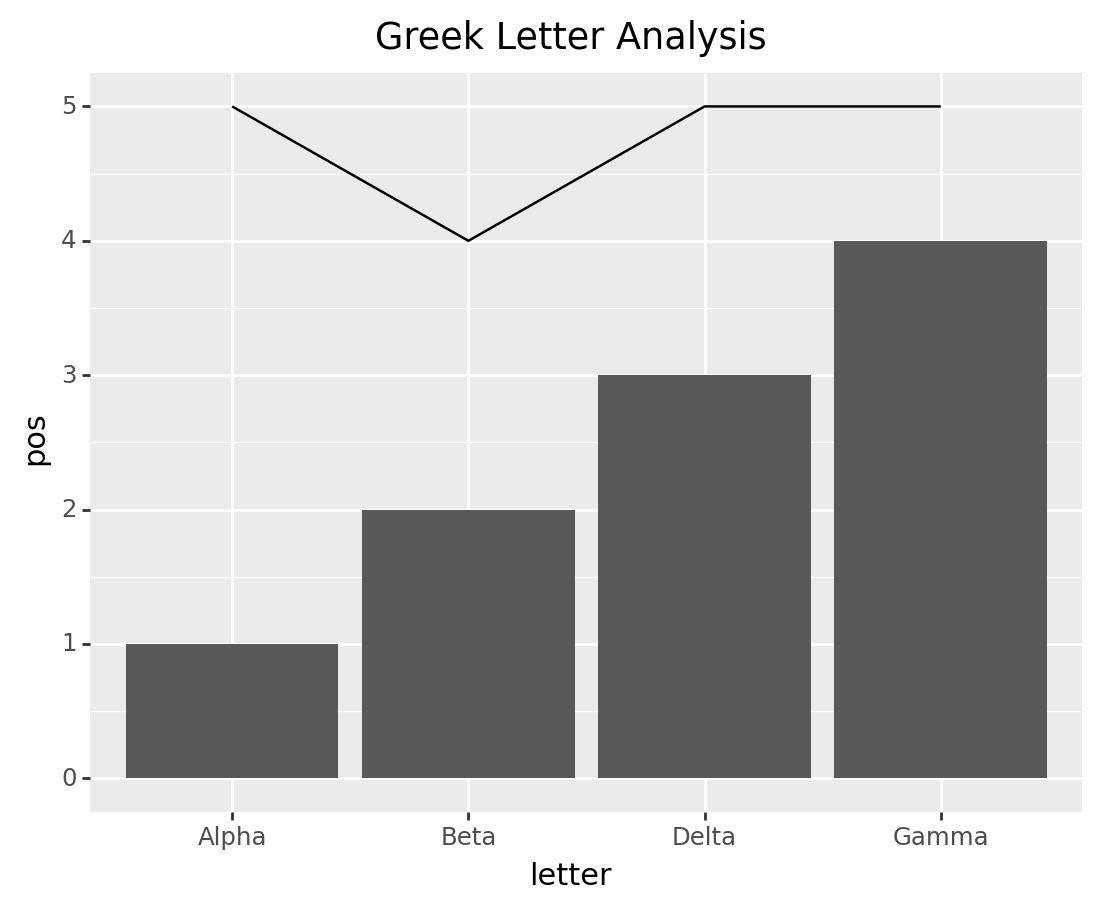

<ggplot: (330254532)>

In [4]:
(ggplot(df)
 + geom_col(aes(x='letter', y='pos'))
 + geom_line(aes(x='letter', y='num_of_letters'), group=1)
 + labs(title='Greek Letter Analysis')
)

That looks like it.

To understand why the behaviour behind the warning is not wrong, let us try a dataframe with 2 points per group.

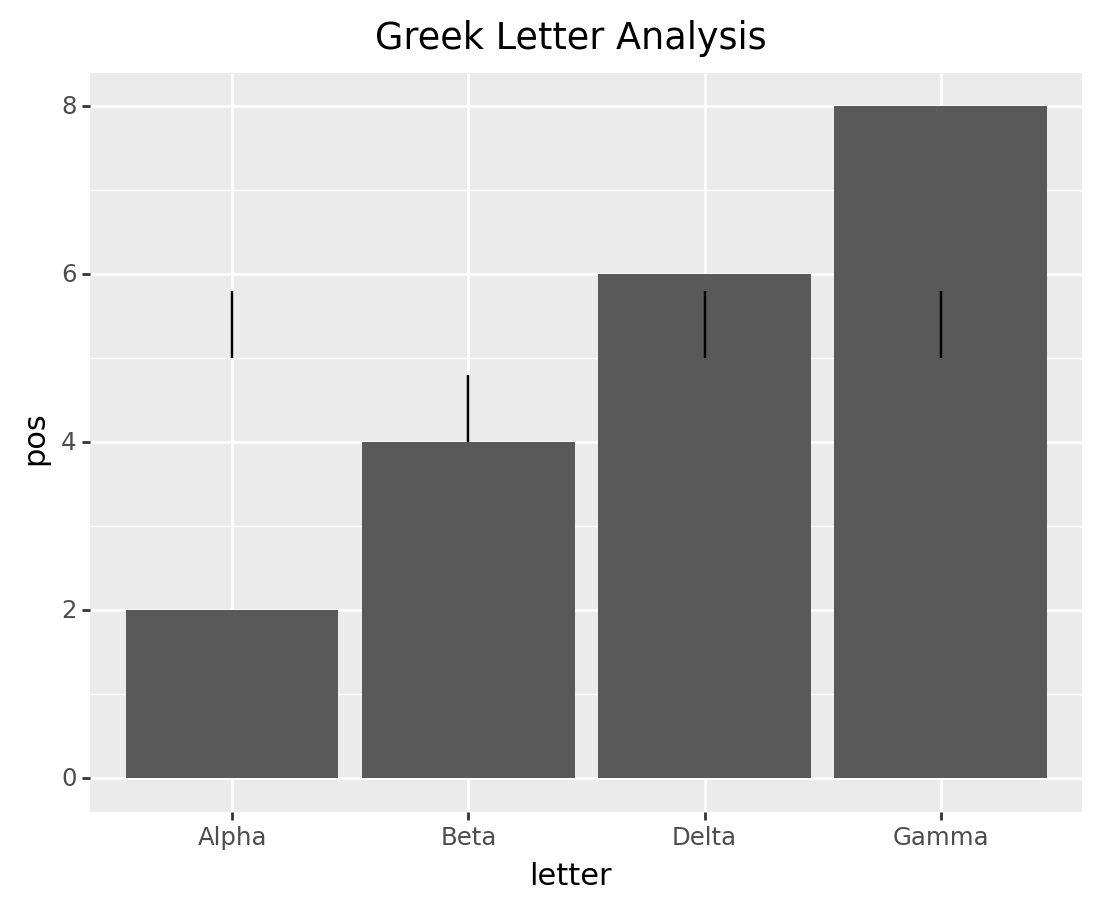

<ggplot: (330323584)>

In [5]:
df2 = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'] * 2,
    'pos': [1, 2, 3, 4] * 2,
    'num_of_letters': [5, 4, 5, 5] * 2
})

df2.loc[4:, 'num_of_letters'] += 0.8

(ggplot(df2)
 + geom_col(aes(x='letter', y='pos'))
 + geom_line(aes(x='letter', y='num_of_letters'))
 + labs(title='Greek Letter Analysis')
)

We get no warning and we get lines.

We can add some color to such a plot.

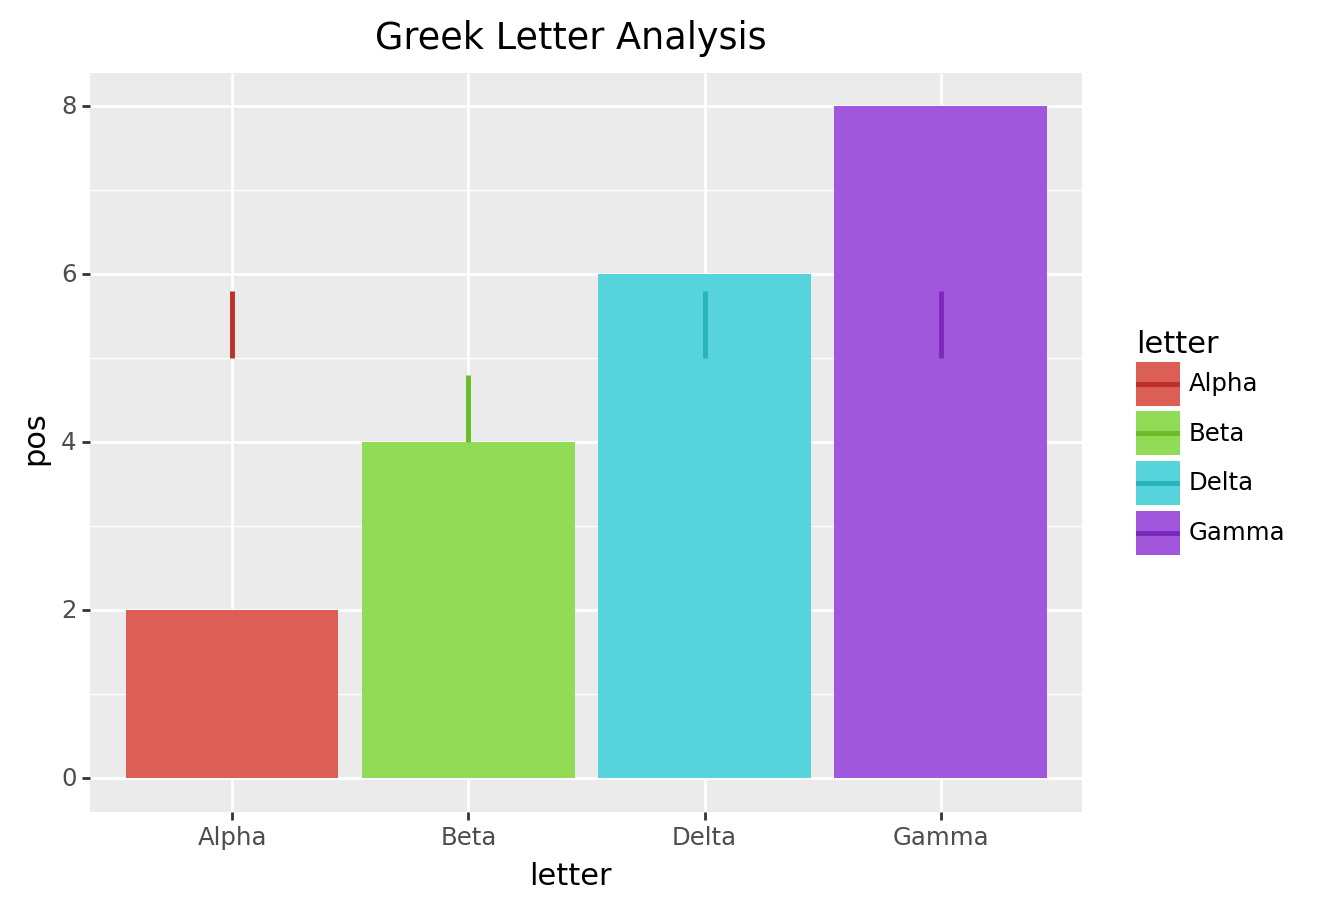

<ggplot: (330380027)>

In [6]:
(ggplot(df2)
 + geom_col(aes(x='letter',y='pos', fill='letter'))
 + geom_line(aes(x='letter', y='num_of_letters', color='letter'), size=1)
 + scale_color_hue(l=0.45)                                  # some contrast to make the lines stick out
 + labs(title='Greek Letter Analysis')
)

**Credit**: github user [@datavistics](https://github.com/datavistics) (derek) whose encounter with this issue motivated this example.